### Contrução de uma CNN para detectar digitos escruitos a mão

In [29]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

Conhecendo e tratando o dataset

In [30]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [31]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
X_treinamento[0] # como a informação de cada pixel só tem uma dimenção, no caso varia entre 0 e 255, a imagem é monocromática


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'classe3')

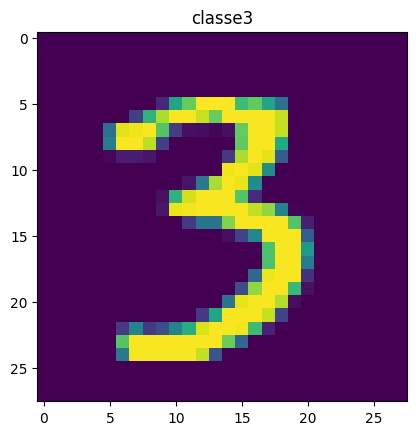

In [34]:
plt.imshow(X_treinamento[10000])
plt.title('classe' + str(y_treinamento[10000]))

In [35]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1) # 1 é a quintidade canais (cores)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1) # 1 é a quintidade canais (cores)

In [36]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [37]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [38]:
X_treinamento /= 255 # binariza os dados
X_teste /= 255 # binariza os dados

In [39]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [40]:
y_treinamento # valores inteiros, vamos criar as categorias

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [42]:
y_treinamento[0] #numero 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Construindo a CNN

In [43]:
rede_neural = Sequential([
    InputLayer(shape=(28,28,1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # realizara 32 convoluções com uma mascara 3x3
    MaxPooling2D(pool_size=(2,2)), #seleciona o maior valor de regioes 2x2 da imagem de entrada
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])


In [44]:
rede_neural.summary()
# teram 5408 na entrada na entrada da rede densa

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
rede_neural.fit(X_treinamento, y_treinamento, 
                batch_size=128, epochs=5,
                validation_data=(X_teste, y_teste))

# enviando 128 amostras por vez será enviado 469 batchs para poder percorrer as 60.000 amostras

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8774 - loss: 0.4381 - val_accuracy: 0.9692 - val_loss: 0.0997
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9759 - loss: 0.0813 - val_accuracy: 0.9826 - val_loss: 0.0539
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9834 - val_loss: 0.0509
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9898 - loss: 0.0347 - val_accuracy: 0.9864 - val_loss: 0.0415
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9927 - loss: 0.0257 - val_accuracy: 0.9858 - val_loss: 0.0416


In [47]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0510


Melhorando a rede

In [48]:
rede_neural = Sequential([
    
    InputLayer(shape=(28,28,1)),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # realizara 32 convoluções com uma mascara 3x3
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)), #seleciona o maior valor de regioes 2x2 da imagem de entrada

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # realizara 32 convoluções com uma mascara 3x3
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)), #seleciona o maior valor de regioes 2x2 da imagem de entrada
    
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.2), # elimina 20% dos 128 neuronios da camada anterior
    Dense(units=128, activation='relu'),
    Dropout(0.2), # elimina 20% dos 128 neuronios da camada anterior
    Dense(units=10, activation='softmax')
    
])

In [49]:
rede_neural.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [50]:
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
rede_neural.fit(X_treinamento, y_treinamento, 
                batch_size=128, epochs=5,
                validation_data=(X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8694 - loss: 0.4149 - val_accuracy: 0.9515 - val_loss: 0.1683
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9808 - loss: 0.0661 - val_accuracy: 0.9892 - val_loss: 0.0366
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.9851 - val_loss: 0.0444
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9904 - val_loss: 0.0324
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9927 - val_loss: 0.0260


In [52]:
resultado = rede_neural.evaluate(X_teste, y_teste)

#resultados proximos, nem sempre a necessidade de aumentar a complexidade

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0316


In [66]:
resultado

[0.025957811623811722, 0.9926999807357788]

Validação cruzada

In [61]:
from sklearn.model_selection import StratifiedKFold
seed = 5 # mantem a mesma forma de divisão dos dados para a cv
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed) # 4 partes treinam e 1 testa 

In [67]:
resultados = []

for i_train, i_test in kfold.split(X_treinamento, np.zeros(shape=(y_treinamento.shape[0], 1))): # matriz de zeros com 60.000 linhas e uma coluna
    print("Indices treinamentos", i_train, "Indices teste:", i_test)
    rede_neural = Sequential([
        InputLayer(shape=(28,28,1)),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # realizara 32 convoluções com uma mascara 3x3
        MaxPooling2D(pool_size=(2,2)), #seleciona o maior valor de regioes 2x2 da imagem de entrada
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    rede_neural.fit(X_treinamento[i_train], y_treinamento[i_train], batch_size=128, epochs=5)
    precisao = rede_neural.evaluate(X_treinamento[i_test], y_treinamento[i_test])
    print("Precisaõ retornada:", precisao)
    resultados.append(precisao[1])


Indices treinamentos [    0     1     2 ... 59997 59998 59999] Indices teste: [    5     7    10 ... 59983 59985 59993]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8646 - loss: 0.5208
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9770 - loss: 0.0783
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9858 - loss: 0.0511
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9887 - loss: 0.0381
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9924 - loss: 0.0265
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0629
Precisaõ retornada: [0.06365889310836792, 0.9800000190734863]
Indices treinamentos [    1     2     5 ... 59995 59996 59999] Indices teste: [    0     3     4 ... 59989 59997 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8560 - loss: 0.5125
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9768 - loss: 0.0801
Epoch 3/5
375/375 ━━━

In [68]:
resultados

[0.9800000190734863,
 0.9796666502952576,
 0.984749972820282,
 0.9818333387374878,
 0.98416668176651]

In [70]:
np.array(resultados).mean()

0.9820833325386047